In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

# Setup paths
here = Path.cwd()
root = next(p for p in [here, *here.parents] if (p / "data" / "raw").exists())

# Load raw datasets
ios_raw = pd.read_csv(root / "data" / "raw" / "ios_turns.csv")
android_raw = pd.read_csv(root / "data" / "raw" / "android_turns.csv")

# Load cleaned datasets
ios_clean = pd.read_csv(root / "data" / "processed" / "ios" / "parent_clean.csv")
android_clean = pd.read_csv(root / "data" / "processed" / "android" / "parent_clean.csv")

# Analysis function
def analyze_dataset(raw, clean, platform):
    stats = {
        "Raw Records": len(raw),
        "Cleaned Records": len(clean),
        "Records Removed %": round((1 - len(clean)/len(raw)) * 100, 2),
        "Raw Null %": round((raw.isnull().sum().sum() / (raw.shape[0] * raw.shape[1])) * 100, 2),
        "Clean Null %": round((clean.isnull().sum().sum() / (clean.shape[0] * clean.shape[1])) * 100, 2)
    }
    
    print(f"\n{platform} Dataset Analysis:")
    for metric, value in stats.items():
        print(f"{metric}: {value}")
        
    # Check value ranges for key metrics
    metrics = ['eventStartSpeed', 'eventEndSpeed', 'eventDurationSeconds', 'eventMilesDriven']
    print("\nKey Metrics Range Comparison:")
    for metric in metrics:
        print(f"\n{metric}:")
        print(f"Raw - Min: {raw[metric].min():.2f}, Max: {raw[metric].max():.2f}")
        print(f"Clean - Min: {clean[metric].min():.2f}, Max: {clean[metric].max():.2f}")

# Run analysis
analyze_dataset(ios_raw, ios_clean, "iOS")
analyze_dataset(android_raw, android_clean, "Android")


iOS Dataset Analysis:
Raw Records: 61094
Cleaned Records: 54455
Records Removed %: 10.87
Raw Null %: 0.01
Clean Null %: 0.01

Key Metrics Range Comparison:

eventStartSpeed:
Raw - Min: -2.24, Max: 2618.08
Clean - Min: 0.00, Max: 101.55

eventEndSpeed:
Raw - Min: -2.24, Max: 1221.43
Clean - Min: 0.00, Max: 101.89

eventDurationSeconds:
Raw - Min: 0.91, Max: 24.98
Clean - Min: 0.91, Max: 15.00

eventMilesDriven:
Raw - Min: 0.00, Max: 1.91
Clean - Min: 0.00, Max: 0.22

Android Dataset Analysis:
Raw Records: 1287
Cleaned Records: 1245
Records Removed %: 3.26
Raw Null %: 0.0
Clean Null %: 0.0

Key Metrics Range Comparison:

eventStartSpeed:
Raw - Min: 0.15, Max: 55.19
Clean - Min: 0.15, Max: 55.19

eventEndSpeed:
Raw - Min: 0.02, Max: 54.74
Clean - Min: 0.02, Max: 54.74

eventDurationSeconds:
Raw - Min: 0.94, Max: 24.40
Clean - Min: 0.94, Max: 14.80

eventMilesDriven:
Raw - Min: 0.00, Max: 0.17
Clean - Min: 0.00, Max: 0.17


In [2]:
# Additional validation checks
def validate_cleaned_data(df, platform):
    assert df['eventStartSpeed'].between(0, 120).all(), f"{platform}: Invalid start speeds"
    assert df['eventEndSpeed'].between(0, 120).all(), f"{platform}: Invalid end speeds"
    assert df['eventDurationSeconds'].between(0, 15).all(), f"{platform}: Invalid durations"
    assert df['eventMilesDriven'].between(0, 0.3).all(), f"{platform}: Invalid distances"

In [3]:
# Run validations
try:
    validate_cleaned_data(ios_clean, "iOS")
    print("\n✅ iOS dataset passed all validation checks")
except AssertionError as e:
    print(f"\n❌ iOS validation failed: {e}")
    
try:
    validate_cleaned_data(android_clean, "Android")
    print("\n✅ Android dataset passed all validation checks")
except AssertionError as e:
    print(f"\n❌ Android validation failed: {e}")

# Compare dataset sizes
print("\nDataset Size Comparison:")
print(f"iOS: {len(ios_clean):,} / {len(ios_raw):,} records retained ({len(ios_clean)/len(ios_raw)*100:.1f}%)")
print(f"Android: {len(android_clean):,} / {len(android_raw):,} records retained ({len(android_clean)/len(android_raw)*100:.1f}%)")

# Check for any remaining nulls
print("\nNull Values Check:")
print("iOS nulls:\n", ios_clean.isnull().sum()[ios_clean.isnull().sum() > 0])
print("\nAndroid nulls:\n", android_clean.isnull().sum()[android_clean.isnull().sum() > 0])


✅ iOS dataset passed all validation checks

✅ Android dataset passed all validation checks

Dataset Size Comparison:
iOS: 54,455 / 61,094 records retained (89.1%)
Android: 1,245 / 1,287 records retained (96.7%)

Null Values Check:
iOS nulls:
 bearingAngleChange    177
gps_radius              2
dtype: int64

Android nulls:
 Series([], dtype: int64)



Statistical Comparison Between Platforms:

eventStartSpeed Statistics:

iOS:
count    54455.000000
mean        15.080417
std          9.189897
min          0.000000
25%          8.286010
50%         13.579220
75%         20.007508
max        101.549355
Name: eventStartSpeed, dtype: float64

Android:
count    1245.000000
mean       13.911908
std         8.786979
min         0.153224
25%         7.955423
50%        11.826427
75%        17.090221
max        55.186930
Name: eventStartSpeed, dtype: float64

eventEndSpeed Statistics:

iOS:
count    54455.000000
mean        16.905710
std          7.992359
min          0.000000
25%         11.412893
50%         15.735309
75%         20.876469
max        101.888290
Name: eventEndSpeed, dtype: float64

Android:
count    1245.000000
mean       16.665047
std         8.425950
min         0.022369
25%        11.360354
50%        15.970686
75%        20.445631
max        54.742170
Name: eventEndSpeed, dtype: float64

eventDurationSeconds Statistics:

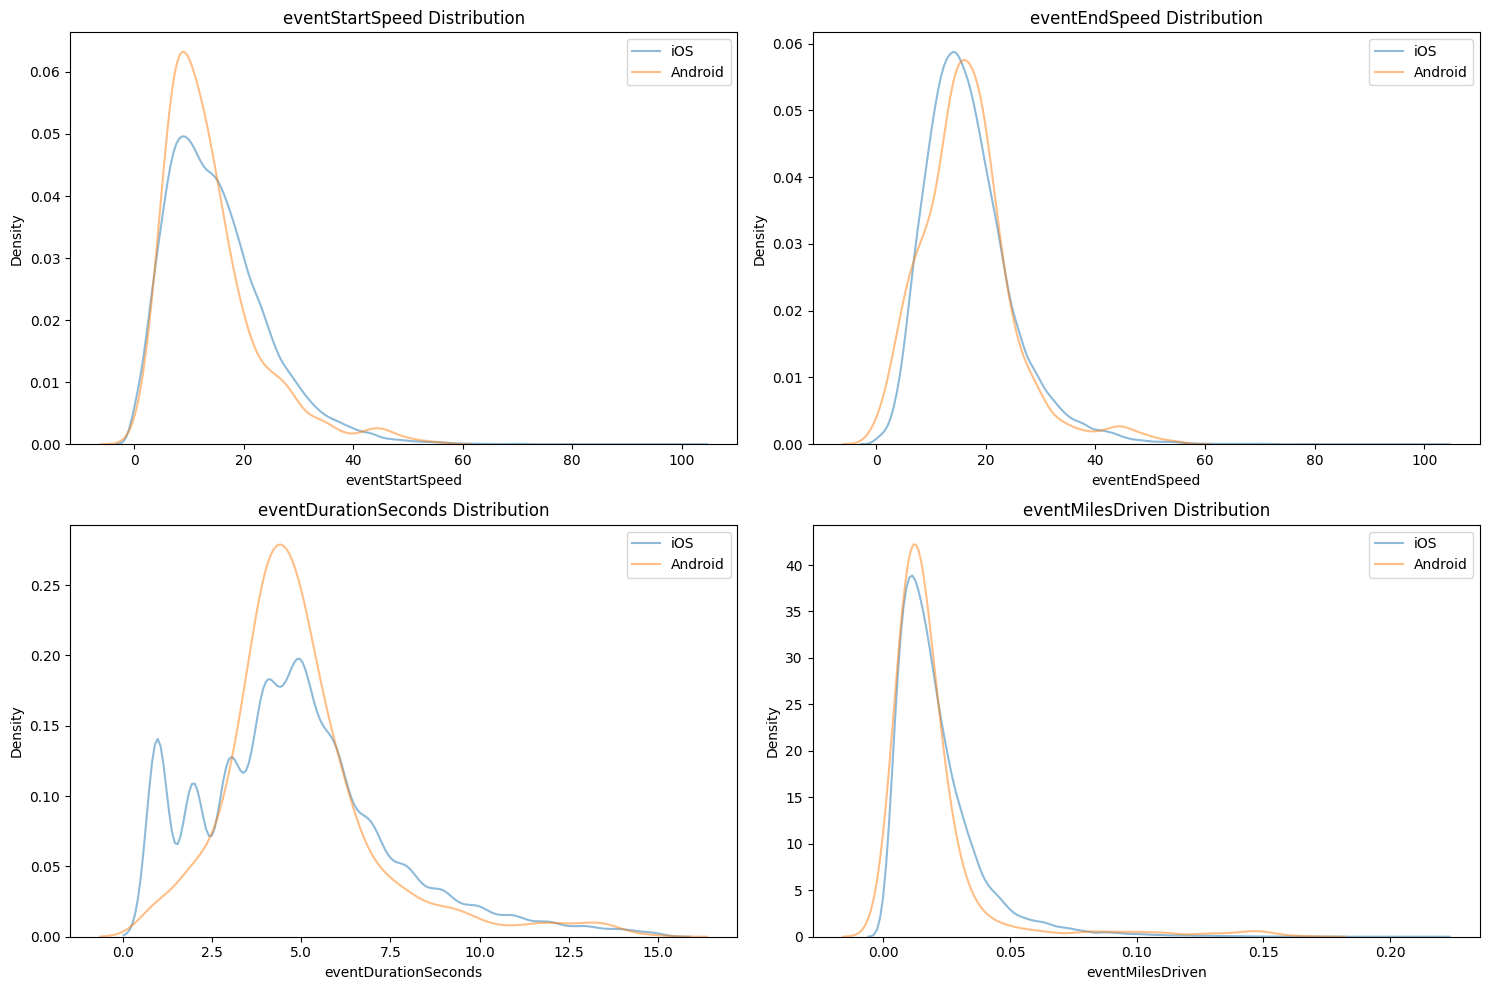


Correlation Analysis:

iOS Correlations:
                      eventStartSpeed  eventEndSpeed  eventDurationSeconds  \
eventStartSpeed                  1.00           0.71                  0.16   
eventEndSpeed                    0.71           1.00                  0.17   
eventDurationSeconds             0.16           0.17                  1.00   
eventMilesDriven                 0.55           0.64                  0.71   

                      eventMilesDriven  
eventStartSpeed                   0.55  
eventEndSpeed                     0.64  
eventDurationSeconds              0.71  
eventMilesDriven                  1.00  

Android Correlations:
                      eventStartSpeed  eventEndSpeed  eventDurationSeconds  \
eventStartSpeed                  1.00           0.78                  0.41   
eventEndSpeed                    0.78           1.00                  0.38   
eventDurationSeconds             0.41           0.38                  1.00   
eventMilesDriven           

In [4]:
# Statistical comparison of key metrics between platforms
metrics = ['eventStartSpeed', 'eventEndSpeed', 'eventDurationSeconds', 'eventMilesDriven']

print("\nStatistical Comparison Between Platforms:")
for metric in metrics:
    print(f"\n{metric} Statistics:")
    print("\niOS:")
    print(ios_clean[metric].describe())
    print("\nAndroid:")
    print(android_clean[metric].describe())

# Check data distributions
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
for idx, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, idx)
    sns.kdeplot(data=ios_clean[metric], label='iOS', alpha=0.5)
    sns.kdeplot(data=android_clean[metric], label='Android', alpha=0.5)
    plt.title(f'{metric} Distribution')
    plt.legend()
plt.tight_layout()
plt.show()

# Check correlations between metrics for each platform
print("\nCorrelation Analysis:")
print("\niOS Correlations:")
print(ios_clean[metrics].corr().round(2))
print("\nAndroid Correlations:")
print(android_clean[metrics].corr().round(2))